In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

## From Biological to Artificial Neurons

#### The Perceptron

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [3]:
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int32) # Iris setosa?

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

## Implementing MLPs with Keras

#### Building an Image Classifier Using the Sequential API

##### Using Keras to load the dataset

In [4]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

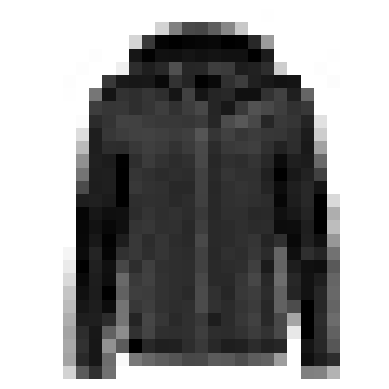

'Coat'

In [10]:
from matplotlib import pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()
class_names[y_train[0]]

##### Creating the model using the Sequential API

In [11]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.layers

In [15]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [16]:
model.get_layer("dense") is hidden1

True

In [17]:
weights, biases = hidden1.get_weights()

In [18]:
weights.shape

(784, 300)

In [19]:
biases.shape

(300,)

##### Compiling the model

In [20]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

##### Training and evaluating the model

In [21]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 2s 1ms/step - loss: 0.7279 - accuracy: 0.7605 - val_loss: 0.5208 - val_accuracy: 0.8246
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4898 - accuracy: 0.8276 - val_loss: 0.4373 - val_accuracy: 0.8492
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4441 - accuracy: 0.8436 - val_loss: 0.5488 - val_accuracy: 0.7944
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4163 - accuracy: 0.8549 - val_loss: 0.3953 - val_accuracy: 0.8624
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3976 - accuracy: 0.8613 - val_loss: 0.3794 - val_accuracy: 0.8670
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3791 - accuracy: 0.8660 - val_loss: 0.3701 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3669 - accuracy: 0.8696 - val_loss: 0.3677 - val_accurac

In [22]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [23]:
len(history.epoch)

30

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

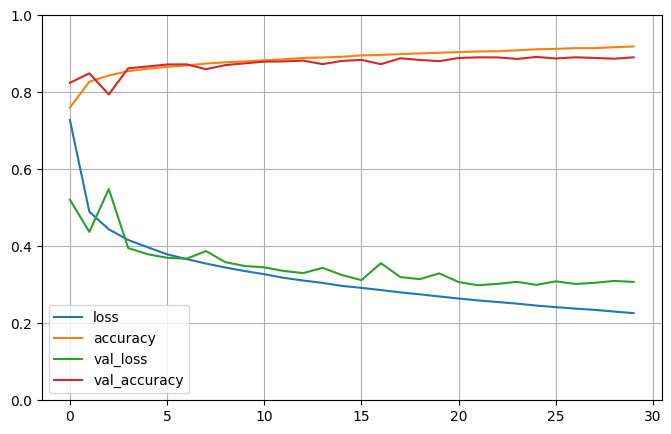

In [25]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 814us/step - loss: 0.3375 - accuracy: 0.8822


[0.3374905288219452, 0.8822000026702881]

##### Using the model to make predictions

In [27]:
X_new = X_test[:3]
y_proba = model.predict(X_new, verbose=0)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [28]:
y_pred = np.argmax(model.predict(X_new, verbose=0), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [29]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [30]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

#### Building a Regression MLP Using the Sequential API

In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [32]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 921us/step - loss: 1.8561 - val_loss: 0.9667
Epoch 2/20
363/363 [==============================] - 0s 968us/step - loss: 0.8161 - val_loss: 0.7399
Epoch 3/20
363/363 [==============================] - 0s 765us/step - loss: 0.7395 - val_loss: 0.6868
Epoch 4/20
363/363 [==============================] - 0s 784us/step - loss: 0.6947 - val_loss: 0.6509
Epoch 5/20
363/363 [==============================] - 0s 888us/step - loss: 0.6592 - val_loss: 0.6099
Epoch 6/20
363/363 [==============================] - 0s 831us/step - loss: 0.6254 - val_loss: 0.5847
Epoch 7/20
363/363 [==============================] - 0s 952us/step - loss: 0.5971 - val_loss: 0.5508
Epoch 8/20
363/363 [==============================] - 0s 752us/step - loss: 0.5707 - val_loss: 0.5273
Epoch 9/20
363/363 [==============================] - 0s 781us/step - loss: 0.5477 - val_loss: 0.5105
Epoch 10/20
363/363 [==============================] - 0s 925us/step - loss: 0.528

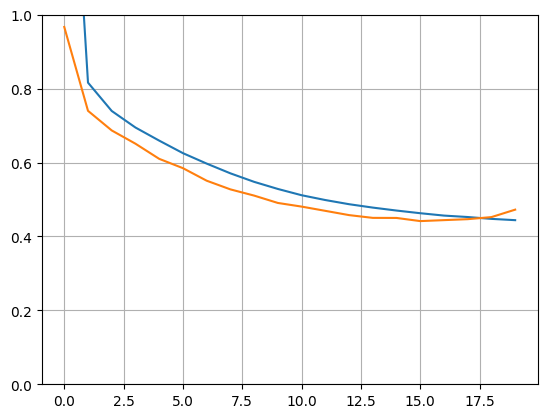

In [33]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [34]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 636us/step - loss: 0.4384


0.43840014934539795

In [35]:
X_new = X_test[:3]
y_pred = model.predict(X_new, verbose=0)
y_pred

array([[0.71248454],
       [1.6296394 ],
       [3.3223798 ]], dtype=float32)

In [36]:
y_new = y_test[:3]
y_new

array([0.477  , 0.458  , 5.00001])

#### Building Complex Models Using the Functional API

In [37]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [38]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_5 (Dense)             (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 30)                   930       ['dense_5[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_6[0][0]']         

In [39]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [40]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 deep_input (InputLayer)     [(None, 6)]                  0         []                            
                                                                                                  
 dense_8 (Dense)             (None, 30)                   210       ['deep_input[0][0]']          
                                                                                                  
 wide_input (InputLayer)     [(None, 5)]                  0         []                            
                                                                                                  
 dense_9 (Dense)             (None, 30)                   930       ['dense_8[0][0]']             
                                                                                            

In [41]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

model.fit((X_train_A, X_train_B), y_train, epochs=20, 
          validation_data=((X_valid_A, X_valid_B), y_valid));

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.7596 - val_loss: 1.0661
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6758 - val_loss: 0.6179
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6046 - val_loss: 0.5581
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5660 - val_loss: 0.5274
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5402 - val_loss: 0.5028
Epoch 6/20
363/363 [==============================] - 0s 989us/step - loss: 0.5194 - val_loss: 0.4852
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5035 - val_loss: 0.4716
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4905 - val_loss: 0.4576
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4793 - val_loss: 0.4475
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4704 - val_loss: 0.43

In [42]:
model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 649us/step - loss: 0.4170


0.41699695587158203

In [43]:
y_pred = model.predict((X_new_A, X_new_B), verbose=0)
y_pred

array([[0.39924923],
       [1.9868264 ],
       [3.2924902 ]], dtype=float32)

In [44]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, 
          validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]));

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.6710 - main_output_loss: 2.4461 - aux_output_loss: 4.6949 - val_loss: 2.0135 - val_main_output_loss: 1.7630 - val_aux_output_loss: 4.2681
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0915 - main_output_loss: 0.8915 - aux_output_loss: 2.8916 - val_loss: 1.2322 - val_main_output_loss: 0.9515 - val_aux_output_loss: 3.7585
Epoch 3/20
363/363 [==============================] - 0s 948us/step - loss: 0.8570 - main_output_loss: 0.7195 - aux_output_loss: 2.0948 - val_loss: 0.9596 - val_main_output_loss: 0.6698 - val_aux_output_loss: 3.5672
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7619 - main_output_loss: 0.6553 - aux_output_loss: 1.7209 - val_loss: 0.9015 - val_main_output_loss: 0.6183 - val_aux_output_loss: 3.4507
Epoch 5/20
363/363 [==============================] - 0s 997us/step - loss: 0.7084 - main_output_loss: 0.6175 - aux_output_loss: 1.5264 - val_

In [45]:
model.evaluate([X_test_A, X_test_B], [y_test, y_test]) # total_loss, main_loss, aux_loss

162/162 [==============================] - 0s 617us/step - loss: 0.4587 - main_output_loss: 0.4175 - aux_output_loss: 0.8292


[0.4587123990058899, 0.41754382848739624, 0.8292308449745178]

In [46]:
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B), verbose=0)
y_pred_main, y_pred_aux

(array([[0.570667 ],
        [2.055773 ],
        [3.2423906]], dtype=float32),
 array([[1.2793012],
        [2.0678008],
        [2.476068 ]], dtype=float32))

#### Using the Subclassing API to Build Dynamic Models

In [47]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs, training=None, mask=None):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [48]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=20, 
          validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)));

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.0078 - output_1_loss: 1.7182 - output_2_loss: 4.6141 - val_loss: 1.6397 - val_output_1_loss: 1.1151 - val_output_2_loss: 6.3616
Epoch 2/20
363/363 [==============================] - 0s 874us/step - loss: 1.0102 - output_1_loss: 0.7636 - output_2_loss: 3.2297 - val_loss: 1.2468 - val_output_1_loss: 0.6872 - val_output_2_loss: 6.2830
Epoch 3/20
363/363 [==============================] - 0s 914us/step - loss: 0.8551 - output_1_loss: 0.6810 - output_2_loss: 2.4224 - val_loss: 1.1792 - val_output_1_loss: 0.6340 - val_output_2_loss: 6.0855
Epoch 4/20
363/363 [==============================] - 0s 878us/step - loss: 0.7719 - output_1_loss: 0.6369 - output_2_loss: 1.9864 - val_loss: 1.0912 - val_output_1_loss: 0.5929 - val_output_2_loss: 5.5755
Epoch 5/20
363/363 [==============================] - 0s 953us/step - loss: 0.7202 - output_1_loss: 0.6068 - output_2_loss: 1.7409 - val_loss: 0.9956 - val_output_1_loss: 0.5634 

In [49]:
model.evaluate((X_test_A, X_test_B), (y_test, y_test)) # total_loss, main_loss, aux_loss

162/162 [==============================] - 0s 563us/step - loss: 0.4935 - output_1_loss: 0.4331 - output_2_loss: 1.0368


[0.49349603056907654, 0.43312856554985046, 1.0368049144744873]

In [50]:
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B), verbose=0)
y_pred_main, y_pred_aux

(array([[0.49490327],
        [1.9394002 ],
        [3.1647596 ]], dtype=float32),
 array([[1.4400126],
        [1.8639205],
        [2.3755949]], dtype=float32))

#### Saving and Restoring a Model

In [51]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [52]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid));

Epoch 1/10
363/363 [==============================] - 0s 926us/step - loss: 2.0995 - val_loss: 0.9966
Epoch 2/10
363/363 [==============================] - 0s 799us/step - loss: 0.8223 - val_loss: 0.9484
Epoch 3/10
363/363 [==============================] - 0s 839us/step - loss: 0.6872 - val_loss: 0.7134
Epoch 4/10
363/363 [==============================] - 0s 760us/step - loss: 0.6343 - val_loss: 0.5798
Epoch 5/10
363/363 [==============================] - 0s 790us/step - loss: 0.5991 - val_loss: 0.5447
Epoch 6/10
363/363 [==============================] - 0s 766us/step - loss: 0.5694 - val_loss: 0.5301
Epoch 7/10
363/363 [==============================] - 0s 816us/step - loss: 0.5452 - val_loss: 0.5141
Epoch 8/10
363/363 [==============================] - 0s 792us/step - loss: 0.5241 - val_loss: 0.4783
Epoch 9/10
363/363 [==============================] - 0s 787us/step - loss: 0.5054 - val_loss: 0.4624
Epoch 10/10
363/363 [==============================] - 0s 775us/step - loss: 0.489

In [53]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 502us/step - loss: 0.4671


0.46712517738342285

In [54]:
model.predict(X_new)

1/1 [==============================] - 0s 31ms/step


array([[0.56384164],
       [1.4558463 ],
       [2.8511465 ]], dtype=float32)

In [55]:
model.save("temp_model.keras")
model = keras.models.load_model("temp_model.keras")

In [56]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 514us/step - loss: 0.4671


0.46712517738342285

In [57]:
model.predict(X_new)

1/1 [==============================] - 0s 30ms/step


array([[0.56384164],
       [1.4558463 ],
       [2.8511465 ]], dtype=float32)

#### Using Callbacks

In [58]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [59]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("temp_model.keras", save_best_only=True)

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), 
          callbacks=[checkpoint_cb]);

Epoch 1/10
363/363 [==============================] - 1s 970us/step - loss: 2.3710 - val_loss: 1.0115
Epoch 2/10
363/363 [==============================] - 0s 807us/step - loss: 0.8887 - val_loss: 0.7591
Epoch 3/10
363/363 [==============================] - 0s 787us/step - loss: 0.7130 - val_loss: 0.6587
Epoch 4/10
363/363 [==============================] - 0s 811us/step - loss: 0.6233 - val_loss: 0.5519
Epoch 5/10
363/363 [==============================] - 0s 805us/step - loss: 0.5666 - val_loss: 0.5134
Epoch 6/10
363/363 [==============================] - 0s 797us/step - loss: 0.5267 - val_loss: 0.4778
Epoch 7/10
363/363 [==============================] - 0s 805us/step - loss: 0.4986 - val_loss: 0.4542
Epoch 8/10
363/363 [==============================] - 0s 778us/step - loss: 0.4775 - val_loss: 0.4577
Epoch 9/10
363/363 [==============================] - 0s 801us/step - loss: 0.4610 - val_loss: 0.4381
Epoch 10/10
363/363 [==============================] - 0s 820us/step - loss: 0.448

In [60]:
model = keras.models.load_model("temp_model.keras") # rollback to best model

In [61]:
model.evaluate(X_valid, y_valid)

121/121 [==============================] - 0s 522us/step - loss: 0.4278


0.4278120994567871

In [62]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), 
          callbacks=[checkpoint_cb, early_stopping_cb]);

Epoch 1/100
363/363 [==============================] - 1s 951us/step - loss: 0.4385 - val_loss: 0.4353
Epoch 2/100
363/363 [==============================] - 0s 792us/step - loss: 0.4302 - val_loss: 0.4545
Epoch 3/100
363/363 [==============================] - 0s 814us/step - loss: 0.4235 - val_loss: 0.4382
Epoch 4/100
363/363 [==============================] - 0s 777us/step - loss: 0.4175 - val_loss: 0.4583
Epoch 5/100
363/363 [==============================] - 0s 812us/step - loss: 0.4128 - val_loss: 0.4433
Epoch 6/100
363/363 [==============================] - 0s 790us/step - loss: 0.4084 - val_loss: 0.4665
Epoch 7/100
363/363 [==============================] - 0s 792us/step - loss: 0.4049 - val_loss: 0.4512
Epoch 8/100
363/363 [==============================] - 0s 804us/step - loss: 0.4014 - val_loss: 0.4262
Epoch 9/100
363/363 [==============================] - 0s 834us/step - loss: 0.3984 - val_loss: 0.4354
Epoch 10/100
363/363 [==============================] - 0s 831us/step - l

In [63]:
model.evaluate(X_valid, y_valid)

121/121 [==============================] - 0s 526us/step - loss: 0.3791


0.37911900877952576

In [73]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("val/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
        
val_train_ratio_cb = PrintValTrainRatioCallback()

In [77]:
model.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid), 
          callbacks=[val_train_ratio_cb], verbose=2);

Epoch 1/3
val/train: 1.05
363/363 - 0s - loss: 0.3536 - val_loss: 0.3707 - 294ms/epoch - 810us/step
Epoch 2/3
val/train: 1.22
363/363 - 0s - loss: 0.3529 - val_loss: 0.4322 - 263ms/epoch - 724us/step
Epoch 3/3
val/train: 1.11
363/363 - 0s - loss: 0.3525 - val_loss: 0.3924 - 258ms/epoch - 712us/step


#### Using TensorBoard for Visualization